# DSC 630 Course Project – Milestone 1 Communication Plan

### Project Plan

I will be working on this project independently.

Weekly Milestone Plan

-	Week 1: Submit Milestone 1 outlining the project plan and peer review target (Complete).
-	Week 2: Select a dataset and submit Milestone 2 (Project Proposal). I intend to use Bank Marketing Dataset from the UCI Machine Learning Repository.
-	Week 3: Complete and submit a peer review of another student’s Milestones.
-	Weeks 4-5: Continue data cleaning, exploration, and early analysis.
-	Week 6: Submit Milestone 3 with preliminary analysis and initial findings.
-	Week 7: Complete peer review of another student’s Milestone 3 submission.
-	Week 8: Finalize analysis and submit Milestone 4 (Final Results).
-	Week 9: Review another student’s Milestone 4 submission.
-	Week 10:  Will submit final deliverables, and the final paper and presentation.

I am planning to dedicate approximately 3 - 4 hours per day to this project. I will dedicate additional time during Week 6, 8, and 10 to ensure my milestones are fully complete.

My weekly routine will include:
•	Dataset review and exploration
•	Data cleaning and analysis
•	Creating visualizations
•	Writing documentation and project reports
•	Participating in peer reviews during designated weeks

# DSC 630 Course Project – Milestone 2

### Project Topic
*Identifying Key Characteristics of Potential Customers Likely to Sign Up for a New Credit Card*
	
### Challenge Statement
How can banks effectively acquire new credit card customers in order to increase their revenues? This is a major challenge in today’s highly competitive financial landscape. Many consumers already possess one or more credit cards and tend to retain them long-term, making customer acquisition increasingly difficult. Once a person adopts a few cards, they are often reluctant to switch providers or add new ones.
However, certain segments of a population include individuals without any credit cards or those who are frequent card switchers - they may be more open to acquiring a new one. Identifying these segments is key. What characteristics define individuals who are more likely to apply for a credit card? What demographics or behavioral patterns signal a higher likelihood of adoption?
Banks that can have answers to these questions will have a competitive edge. Rather than relying on broad, expensive marketing efforts, banks could focus their resources on high-potential customer segments, increasing efficiency and effectiveness in acquisition strategies.

### Business Justification
By gaining better understanding from marketing campaigns, in which specific individuals are more likely to be interested in new credit card offers and are more prone to sign up for one, banks can significantly improve marketing outcomes. By targeting the right audience, banks can reduce marketing costs, increase conversion rates, and improve return on investment (ROI). Predictive modeling based on customer characteristics allows institutions to transition from mass marketing to personalized outreach, resulting in better customer acquisition and greater overall profitability.

### Dataset Description
The project will use the Bank Marketing Dataset from the UCI Machine Learning Repository. This dataset contains information about marketing campaigns conducted by a Portuguese banking institution, including whether or not a client subscribed to a term deposit product.
Although the original target variable is related to term deposit subscriptions, the marketing response data can be reasonably adapted to simulate customer decisions around adopting financial products - making it relevant for modeling credit card acquisition.

### Key features in the dataset include:
-	Demographics: age, job, marital status, education
-	Financial attributes: default history, housing loan, personal loan
-	Contact and campaign details: contact method, number of contacts, previous campaign outcome
-	Target variable: whether the client subscribed to the product (binary: yes/no)
This dataset is suitable for classification modeling and aligns with the project's goal of identifying individuals likely to respond positively to financial product offers such as credit cards.

### Project Plan
Tools: Python (pandas, scikit-learn, matplotlib), Jupyter Notebook
Methodology:

1.	Data cleaning and preprocessing
2.	Exploratory Data Analysis (EDA)
3.	Feature selection and engineering
4.	Train/test data split
5.	Application of supervised classification models such as Logistic Regression, Decision Trees, and Random Forests.
6.	Model evaluation using accuracy, precision, recall, ROC-AUC
7.	Interpretation of feature importance and formulation of business recommendations

### Risks and Ethical Concerns
While the dataset used in this project originates from the UCI Machine Learning Repository and contains no personally identifiable information (PII), ethical considerations still apply. The data includes sensitive attributes such as age, employment status, marital status, and financial history (e.g., loan status), which could unintentionally introduce bias into the model. For example, if the model might favor certain age groups or employment types and if not carefully balanced, it can lead to discriminatory outcomes in marketing practices.

In addressing these concerns, I will ensure that model development includes fairness checks and will avoid using attributes in a way that could lead to biased targeting. Additionally, since the dataset is fully anonymized and publicly available, there are no privacy risks or ethical violations in terms of data sourcing.

### Expected Outcome
The final model will predict the likelihood of a customer signing up for a new credit card based on their demographic and behavioral characteristics. All the insights derived from this model will help banks refine their marketing strategies by identifying high-probability customers, reducing acquisition costs, and increasing revenue through more targeted campaigns.

### Contingency Plan
If the original dataset that I chose does not yield meaningful results, I will implement several contingency strategies to improve the project. First, I will explore feature engineering to create new combined variables from existing ones that may enhance model performance. If it’s necessary, I will supplement the dataset with additional sources that will provide complementary customer or financial behavior data. Another option is to adjust the target variable or simplify the modeling approach by focusing only on key demographic attributes. If the target labels prove unreliable, I may also consider using unsupervised learning techniques such as clustering to identify distinct customer segments.

# DSC 630 Course Project – Milestone 3: Preliminary Data Exploration

In [1]:
import pandas as pd

# Loading the dataset using semicolon as the delimiter
df = pd.read_csv('bank-full.csv', sep=';')

# Displaying the first few rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Initial Observations

This dataset was acquired from a Portuguese bank’s marketing campaign promoting term deposit products. It includes demographic and financial information for over 45,000 clients, as well as details on the campaign and its outcome.

- The dataset contains **45,211 rows** and **17 columns**.
- **7 columns** are numerical (e.g., `age`, `balance`, `duration`) and **10 columns** are categorical (e.g., `job`, `education`, `contact`).
- The **target variable** is `y`, which indicates whether a client subscribed to the product (`yes`) or not (`no`).
- Several fields contain the value `"unknown"`, which may require cleaning or imputation during data preprocessing.
- The goal of this study is to identify patterns in the data that can help for banks predict whether a client will likely to subscribe to a **credit card product**, with the assumtion of using similar campaign structure.

### Exploratory Data Analysis (EDA) 

In this section, I will begin exploring the dataset to gain insight into the data, understand the distribution of all the features, examine relationships between variables, and identify if any potential data quality issues such as missing values or skewed distributions exist. This step will help guide feature selection and inform modeling decisions later in the project.

### Step 1: Show basic information about the dataset

In [2]:
# Displaying shape and structure
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Step 2: Preview the First Few Rows of the Dataset

Below is a preview of the dataset to get an initial look at how the features are structured and how the data appears. This helps confirm that the data was loaded correctly.

In [3]:
# Showing the first few rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Step 3: Check for missing or “unknown” values

In [4]:
# Counting missing values (nulls)
print("Missing values per column:")
print(df.isnull().sum())

# Counting "unknown" values
print("\n'Unknown' values per column:")
print((df == "unknown").sum())

Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

'Unknown' values per column:
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


### Missing and Unknown Values

There are no missing (NaN) values in the dataset. However, several categorical features use "unknown" as a placeholder for missing data:

| Column      | "unknown" Count |
| ----------- | --------------- |
| `job`       | 288             |
| `education` | 1,857           |
| `contact`   | 13,020          |
| `poutcome`  | 36,959          |

**Note**: These issues will need to be addressed during data preprocessing in Milestone 4 - either by imputing missing values, dropping rows, or treating `"unknown"` as a separate category depending on the context.

### Step 4: Summary statistics for numerical columns

In [5]:
# Summary statistics for numeric columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


| Feature    | Min   | Max    | Mean   | Std. Dev | Notes                                   |
| ---------- | ----- | ------ | ------ | -------- | --------------------------------------- |
| `age`      | 18    | 95     | 40.94  | 10.62    | Normal distribution                     |
| `balance`  | -8019 | 102127 | 1362   | 3045     | Large range; contains negative balances |
| `duration` | 0     | 4918   | 258.16 | 257.53   | Call duration in seconds, very skewed   |
| `campaign` | 1     | 63     | 2.76   | 3.10     | # contacts during campaign              |
| `pdays`    | -1    | 871    | 40.20  | 100.13   | -1 indicates no prior contact           |
| `previous` | 0     | 275    | 0.58   | 2.30     | # contacts before campaign              |


#### Observations:

- balance contains negative values, which may reflect overdrafts.

- duration is likely right-skewed and highly influential on the target variable.

- pdays uses -1 as a sentinel value (requires recoding later).



### Step 5: Target Variable Distribution
In this step, I will examine the class distribution of the target variable y. This will help:

- Determine how balanced the dataset is

- Decide whether techniques like resampling or special evaluation metrics (such as precision, recall, or F1 score) may be necessary

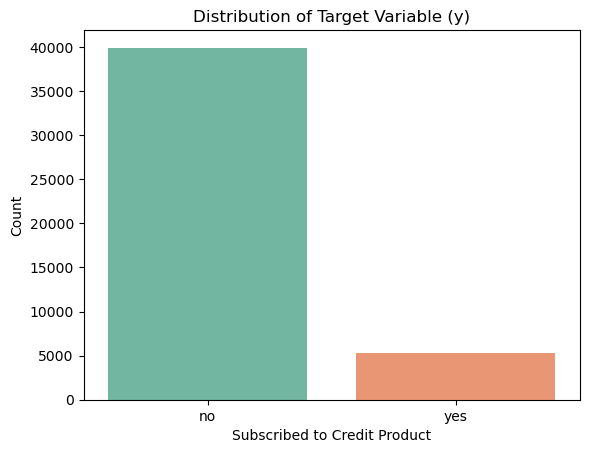

Target variable distribution (%):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the target variable
sns.countplot(data=df, x='y', hue='y', palette='Set2', legend=False)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Credit Product')
plt.ylabel('Count')
plt.show()

# Printing percentage distribution
target_distribution = df['y'].value_counts(normalize=True) * 100
print("Target variable distribution (%):")
print(target_distribution)

### Target Variable Distribution Results

The target variable `y` is highly imbalanced:
- 88.3% of the clients did **not** subscribe to the product (`no`)
- Only 11.7% subscribed (`yes`)

This imbalance may affect model performance, especially if accuracy is used as the main metric. Therefore, additional steps such as **resampling** or **choosing alternative evaluation metrics** (e.g., precision, recall, F1-score) may be needed to build a meaningful predictive model.


### Step 6: Explore Categorical Variables

In [7]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('y')  # Excluding target variable for now
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

### Plotting Value Counts by Category

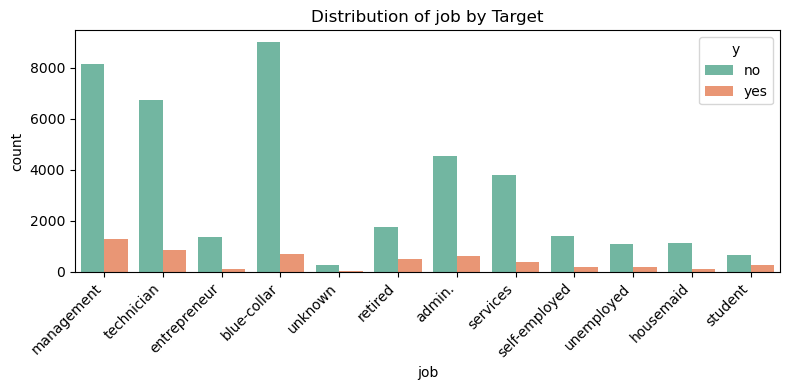

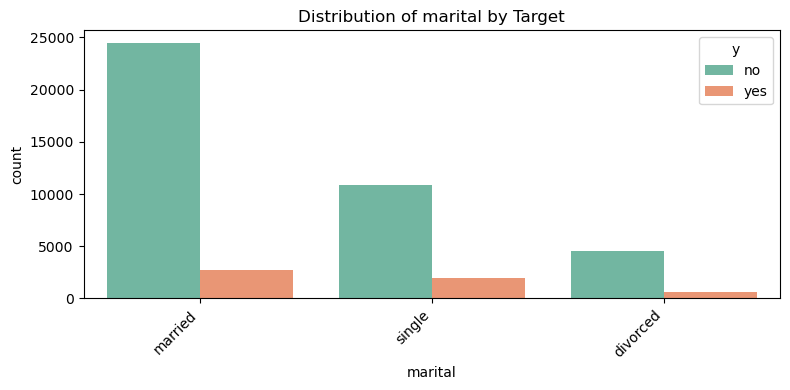

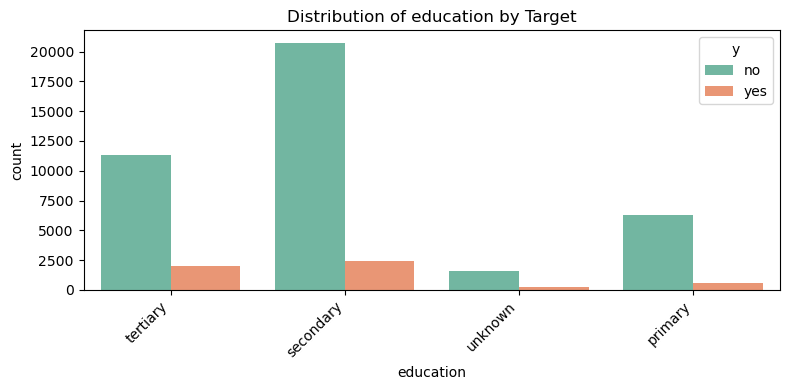

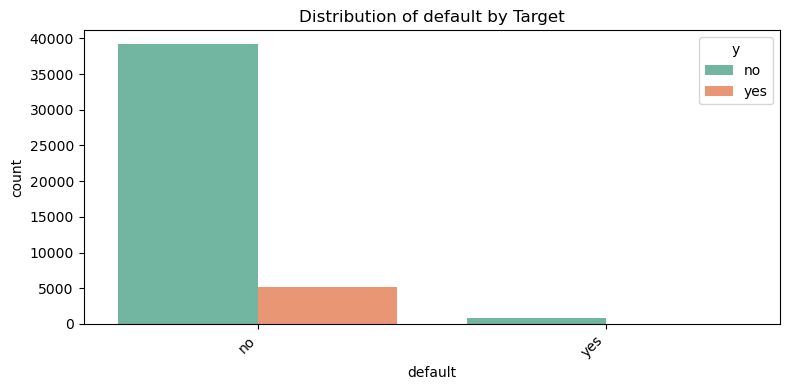

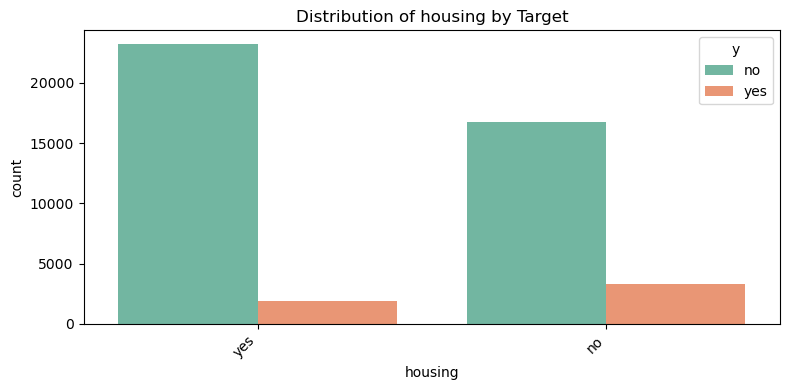

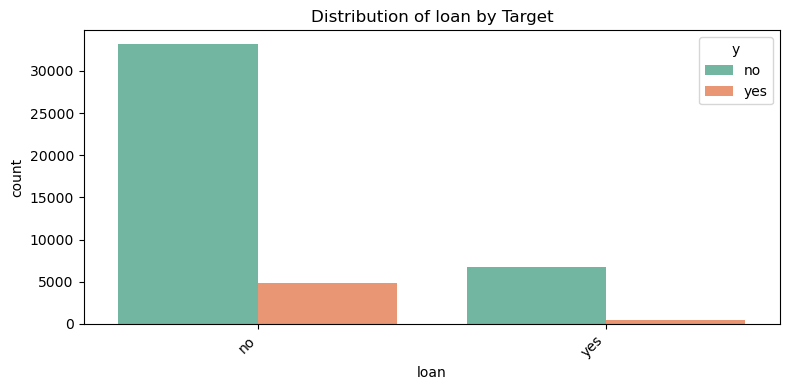

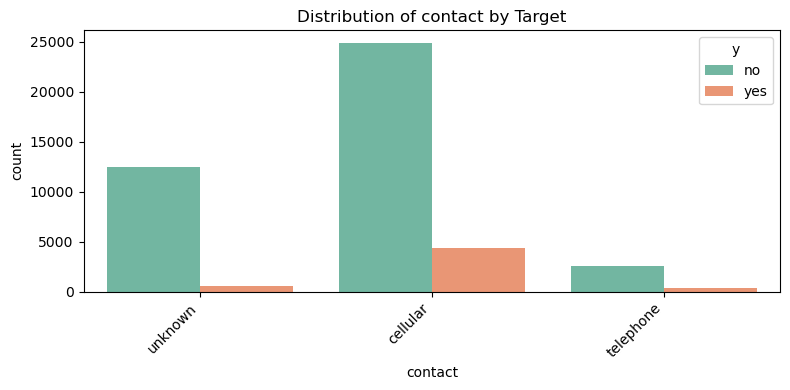

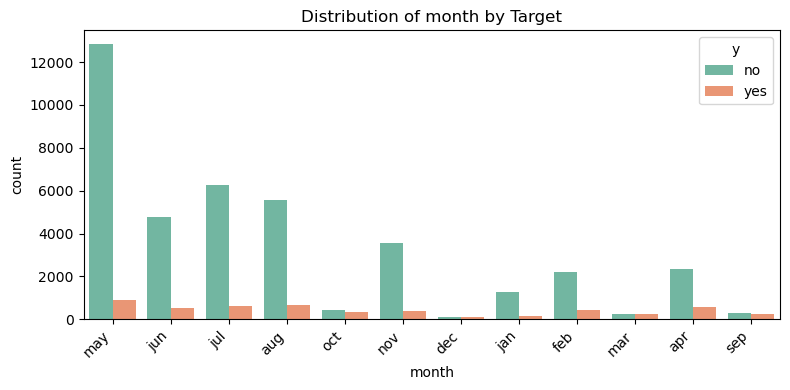

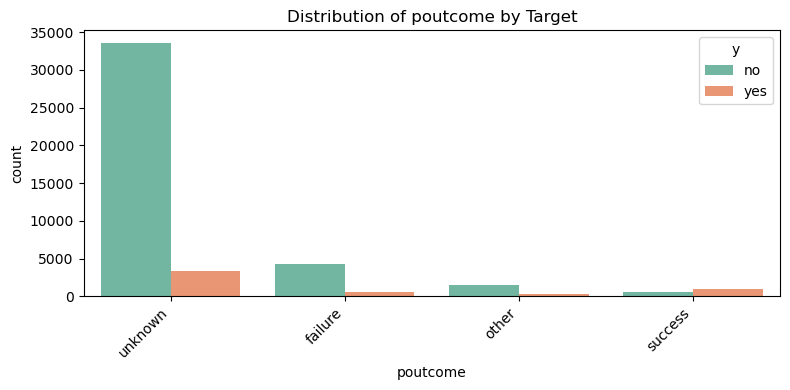

In [8]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='y', palette='Set2')
    plt.title(f'Distribution of {col} by Target')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Summary of Observations

**Job vs. Subscription:**  
Although the total number of "no" responses dominates across all job categories, some groups show notable positive response rates. For example, students had roughly 1,000 total responses, with nearly half responding "yes" - suggesting a strong interest in credit card offers, likely due to financial insecurity or the need for emergency funding. Other categories with meaningful "yes" responses include:

- **Retired:** Approximately 2,000 “no” responses and around one-third “yes,” indicating moderate interest.
- **Self-employed:** Roughly 1,800 “no” and about 20% “yes.”
- **Unemployed:** Around 1,600 “no” and an estimated 15% “yes.”
- **Housemaid:** Around 1,800 total with approximately 10% “yes.”

In contrast, job categories typically associated with higher or stable income (e.g., management, technician, blue-collar, admin, and services) had significantly lower “yes” rates, suggesting less need or interest in new credit cards.

**Marital Status:**  
Among married clients, about 25,000 declined the offer, and 2,500 accepted - roughly a 10% positive response rate.  
Singles, on the other hand, showed a much higher success rate: around 11,000 total responses with approximately 2,000 “yes” (18.18%).  
Divorced clients had around 6,000 “no” and 1,000 “yes” - a 16.66% success rate.  
These results suggest that unmarried individuals may be more receptive to financial product offers.

**Education:**  
- **Secondary education:** About 20,000 “no” and 2,500 “yes” - a 12.5% success rate.  
- **Tertiary education:** Around 15,000 “no” and 2,400 “yes” - about 16%.  
- **Unknown:** 2,000 “no” and 500 “yes” - a 20% success rate, though this group is hard to interpret.  
- **Primary education:** The numbers are relatively small and less impactful for analysis.

**Default History:**  
Clients with **no defaults** had around 40,000 “no” and 5,000 “yes” - a meaningful 12.5% success rate.  
Clients **with defaults** had around 1,000 “no” responses and negligible or no “yes” responses. This may indicate lower eligibility or interest.

**Housing Loan Status:**  
Clients **with housing loans**: About 25,000 “no” and 2,500 “yes” - ~10% success rate.  
Clients **without housing loans**: Around 16,000 “no” and 3,000 “yes” - ~18.75%.  
This outcome indicates that clients without housing loans are more likely to respond to credit card offers.

**Personal Loan Status:**  
- **No personal loan:** 35,000 “no” and 5,000 “yes” - ~14.29%.  
- **With personal loan:** 7,000 “no” and 1,000 “yes” - also ~14.29%.  
Both groups have similar response rates, indicating that personal loan status may not significantly affect interest in new credit cards.

**Contact Method:**  
- **Unknown contact method:** 14,000 “no” and 1,000 “yes” - ~7.14% success rate.  
- **Cellular:** 24,000 “no” and 4,000 “yes” - ~16.67%.  
- **Telephone (landline):** 3,000 “no” and 1,000 “yes” - ~33.33%.  
Clients contacted by telephone landline appear more likely to subscribe, making this the most effective channel.

**Month of Contact:**  
Certain months had significantly higher success rates:  
- **October:** ~400 “no” and 300 “yes” - ~75%.  
- **December:** ~100 “no” and 100 “yes” - ~100%.  
- **March:** ~200 “no” and 200 “yes” - ~100%.  
- **September:** ~300 “no” and 200 “yes” - ~66.67%.  
These months may reflect better timing for marketing campaigns and should be prioritized.

**Previous Campaign Outcome (poutcome):**  
- **Unknown:** ~34,000 “no” and 4,000 “yes.”  
- **Failure:** ~4,000 “no” and 1,000 “yes.”  
- **Other:** ~2,000 “no” and 500 “yes.”  
- **Success:** ~800 “no” and 1,000 “yes.”  
Clients with previous successful outcomes are significantly more likely to respond positively to the current campaign.

### Planned Evaluation Metrics

The dataset shows a significant class imbalance in the target variable, with approximately 88% "no" vs. 12% "yes". This means that accuracy alone won’t be a sufficient evaluation metric for later modeling.

To better assess model performance, I plan to use the following evaluation techniques in future milestones:

- **Precision & Recall**: To evaluate the model’s ability to correctly identify true positives without overpredicting.
- **F1 Score**: A balanced metric that combines precision and recall - especially useful in imbalanced datasets.
- **Confusion Matrix**: To visualize how predictions are distributed across actual classes.
- **Gain and Lift Charts**: Particularly helpful in marketing applications to understand how well the model identifies high-probability responders.

These metrics will be implemented in Milestone 4 or Milestone 5 during model training and evaluation.

### Reflections & Adjustments
After exploring the dataset, I believe the data is sufficient to support the core question of this project - identifying customer characteristics that predict a likelihood of signing up for a financial product. While the dataset originally focuses on term deposit subscriptions, the behavioral patterns and marketing responses it contains are still highly relevant for modeling interest in credit card offers.

###### Will I be able to answer the questions I want to answer with the data I have?
Yes, the dataset includes a wide range of demographic and behavioral attributes that can be used to build meaningful classification models. The target variable (y) will be interpreted as a proxy for responding positively to a credit offer.

###### Do I need to adjust the data and/or driving questions?
So far, the main driving question remains valid. However, I’ll continue to explore whether certain features (like pdays, poutcome, or duration) are relevant or need transformation. If necessary, I may refine the feature set during modeling.

###### Do I need to adjust my model/evaluation choices?
Due to the class imbalance in the target variable, I plan to incorporate additional evaluation metrics beyond accuracy (such as F1 score, precision, recall, and Gain/Lift charts). This ensures the model is not biased toward the majority class.

###### Are my original expectations still reasonable?
Yes. The exploratory analysis has revealed promising trends, especially within certain job roles, education levels, and contact methods. These insights suggest that predictive modeling should be able to uncover patterns that banks can use to target potential credit card customers more effectively.

# DSC 630 Course Project – Milestone 4: Finalizing Results

## Introduction

This Milestone represents the continuation of Milestone 3 and is the near-final stage of analysis for the course project that is titled **"Identifying Key Characteristics of Potential Customers Likely to Sign Up for a New Credit Card"**. For this initiative, the Bank Marketing dataset from UCI was used and the goal of this project is to identify which characteristics are most predictive of a customer subscribing to a term deposit product, which is also serves as a proxy for signing up for a new credit card.

In this milestone, we will:

- Describe the data preparation process in detail.
- Build and evaluate classification models.
- Interpret model results and feature importance.
- Begin forming conclusions and actionable recommendations.


## Data Preparation

For this project the dataset used is the Bank Marketing dataset from the UCI Machine Learning Repository. This data contains information on 41,188 contacts related to the direct marketing campaigns that were conducted by a Portuguese banking institution. Each of the record includes demographic customer information like age, job, marital status, financial variables such as balance, housing loan, and campaign-related attributes that represent number of contacts, and last contact duration.

### Steps Taken:

1. **Loading the Data**  
   First, the dataset was loaded into a pandas DataFrame and checked for structure, types, and summary statistics.

2. **Handling Missing Values**  
   This dataset did not have null values. However, the `"unknown"` category was present in some categorical features such as `"job"` and `"education"`. These values were kept in dataset and were treated as a separate category instead of being removed or imputed.

3. **Feature Engineering**  
   - The target variable, `"y"`, was converted into binary format: 1 for `"yes"` and 0 for `"no"`.
   - The categorical variables were encoded using **one-hot encoding** to convert them into numeric format.
   - Features that may cause data leakage like `"duration"` were removed, as they are only become known after a call is completed and otherwise would not be available for prediction in real-time.

4. **Train/Test Split**  
   The dataset was split into into two parts, a **training set comprising 80%** and a **test set comprising 20%**, using stratified sampling method to maintain the same proportion of positive cases in both sets due to the class imbalance.

5. **Feature Scaling**  
   - The Numerical features such as `"age"`, `"balance"`, and `"campaign"` were standardized using **StandardScaler**.
   - Scaling was applied after the train/test split to avoid data leakage.

## Model Building and Evaluation – Logistic Regression
To begin modeling, a Logistic Regression classifier was selected as a baseline model. This is a commonly used model for binary classification problems like this one where we predicting one of two outcomes, whether a customer will subscribe to a term deposit or not.
The reason Logistic Regression was chosen is due for its simplicity, interpretability, and ease of implementation. However, since the target variable is imbalanced - with only about 11% positive responses - we expect it may struggle to detect the minority class without further tuning or adjustments.

The following steps were performed:

- The data was split into two parts, training and test sets using stratified sampling.
- Numerical features were standardized using StandardScaler.
- This model trained on the training set and evaluated on the test set.
- The metrics like accuracy, precision, recall, F1 score, and ROC AUC were used for evaluation.


Below is the code used to train and evaluate the Logistic Regression model:

In [9]:
# Dropping the 'duration' column if it hasn't already been dropped
if 'duration' in df.columns:
    df = df.drop(columns='duration')

# Converting target to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Defining features (X) and target (y)
X = df_encoded.drop(columns='y')
y = df_encoded['y']

Evaluation Metrics (Logistic Regression):
Accuracy: 0.7553
Precision: 0.2670
Recall: 0.6257
F1 Score: 0.3743
ROC AUC: 0.7722


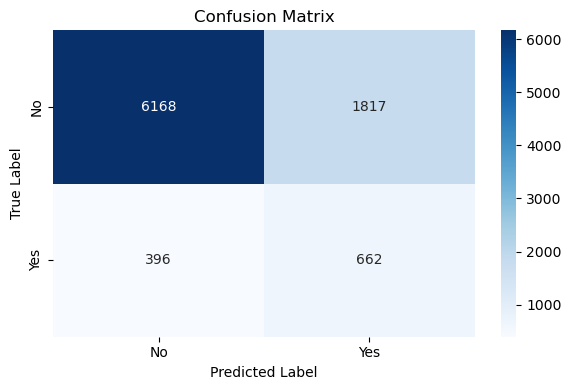

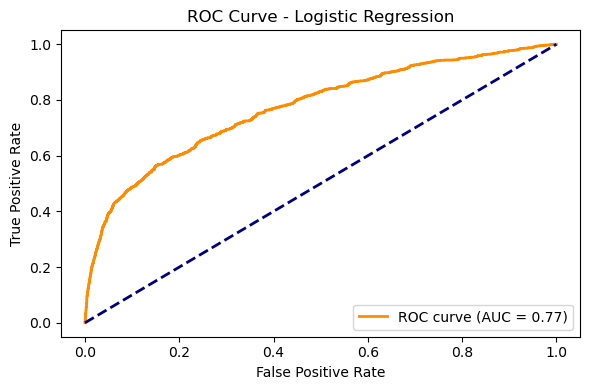

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling for numeric columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# List of numeric columns to scale (excluding 'duration')
num_cols = ['age', 'balance', 'campaign', 'previous', 'pdays']
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# Building logistic regression model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Printing metrics
print("Evaluation Metrics (Logistic Regression):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix_small.png', dpi=150)  # Save smaller image
plt.show()

# ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("roc_auc_curve_small.png", dpi=150, bbox_inches='tight')
plt.show()

## Model Interpretation
This Logistic Regression model was trained to predict, if after marketing compain a customer will subscribe to a term deposit based on various demographic and behavioral features. 

The model achieved the following performance on the test set:

- **Accuracy:** 75.53%
- **Precision:** 26.70%
- **Recall:** 62.57%
- **F1 Score:** 37.43%
- **ROC AUC:** 77.22%
  
These results show that while the model is moderately good at distinguishing between customers who are likely to subscribe and those who are not, as shown by the ROC AUC score of 0.77 (or 77.22%), its **precision is relatively low**, meaning a high number of false positives (predicting "yes" when the actual answer is "no"). However, the **recall** for this model is fairly strong and achived 62.6%, indicating the model is capturing a significant portion of the actual "yes" customers.

The confusion matrix confirms this trade-off:

- The model correctly predicted **662 subscribers**, but also falsely predicted 1,817 non-subscribers as subscribers.

- At the same time, it correctly identified **6,168 non-subscribers**.

## Recommendations

- **Use the model for broad targeting campaigns.** Given its high recall, the model can be useful in campaigns where identifying as many potential customers as possible is more important than minimizing false positives (e.g., sending promotional emails, ads, or trial offers).
  
- **Pair with cost-benefit analysis.** Since false positives can incur costs (e.g., contacting uninterested users), marketing teams should always look from economical stand point, meaning balance the campaign cost against the expected revenue per converted customer.

  
- **Explore other classification models.** It is important to note that more complex model like Random Forest or XGBoost might improve the precision-recall balance and reduce false positives.

  
- **Feature engineering.** Removing features like 'duration' (which isn't available before the campaign call) was the right step. Further tuning or interaction terms may also improve performance.

  
- **Threshold tuning.** Marketing team should consider adjusting the classification threshold to improve precision, depending on the marketing goal, for example, targeting fewer but more likely customers.
